In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df2 = df.drop(columns='customerID')

In [9]:
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

df2['Churn'] = df2['Churn'].astype(int)

df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


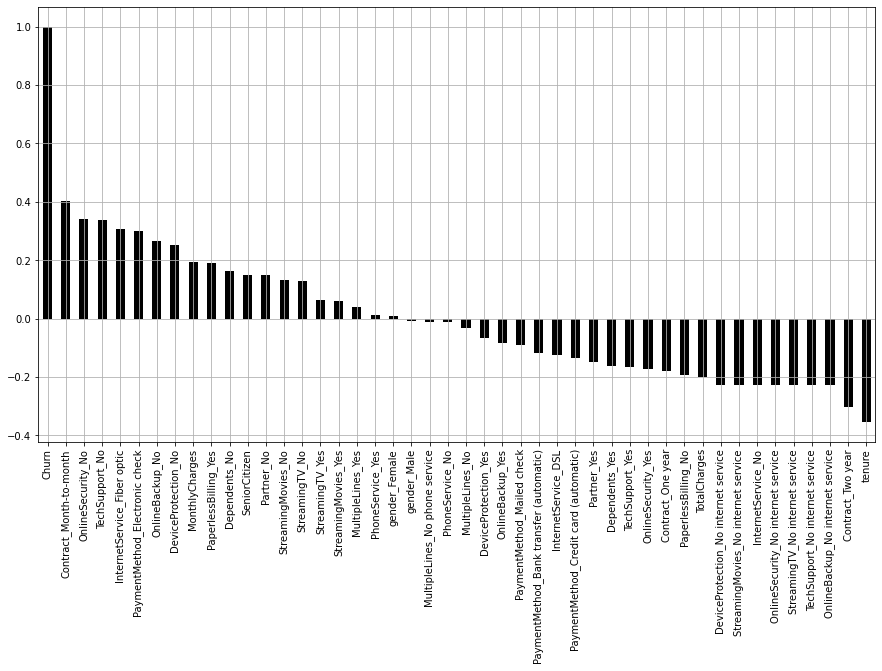

In [10]:
plt.figure(figsize=(15, 8))
ax = df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', cmap='copper')
ax.grid()

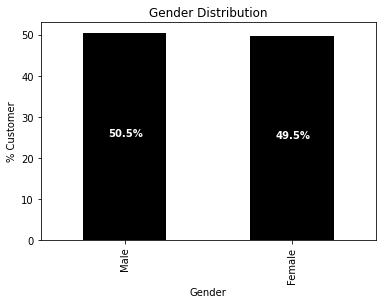

In [11]:
ax = (df['gender'].value_counts()*100/len(df)).plot.bar(cmap='copper')
ax.set_title('Gender Distribution')
ax.set_ylabel('% Customer')
ax.set_xlabel('Gender')
for p in ax.patches:
    ax.text(p.get_x()+.15, .5*p.get_height(), str(round(p.get_height(), 1))+'%', weight='bold', color='white')

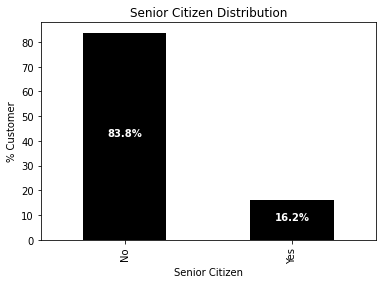

In [12]:
ax = (df['SeniorCitizen'].value_counts()*100/len(df)).plot.bar(cmap='copper')
ax.set_title('Senior Citizen Distribution')
ax.set_ylabel('% Customer')
ax.set_xlabel('Senior Citizen')
ax.set_xticks([0,1], ['No', 'Yes'])
for p in ax.patches:
    ax.text(p.get_x()+.15, 0.5*p.get_height(), str(round(p.get_height(), 1))+'%', weight='bold', color='white')

In [13]:
df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Partner', 'Dependents'])

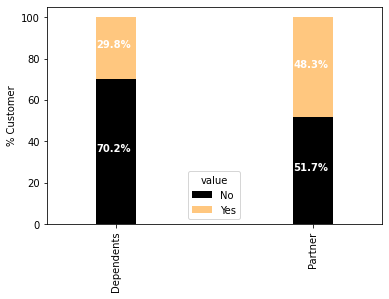

In [14]:
ax = (df2.groupby(['variable', 'value']).count().unstack()['customerID']*100/len(df)).plot.bar(cmap='copper', stacked=True, width=0.2)
ax.set_ylabel("% Customer")
ax.set_xlabel("")

for p in ax.patches:
    ax.text(
        p.get_x(),
        p.get_y() + 0.5*p.get_height(),
        str(round(p.get_height(), 1))+'%',
        weight='bold',
        color='white'
    )

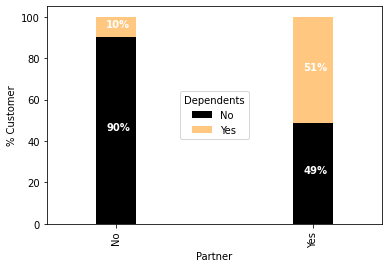

In [15]:
group = df.groupby(['Partner', 'Dependents']).size().unstack()
ax = (group.T*100/group.T.sum()).T.plot.bar(stacked=True, width=0.2, cmap='copper')
ax.set_ylabel("% Customer")
ax.legend(loc='center', title='Dependents')#, fontsize=14)

for p in ax.patches:
    ax.text(
        p.get_x()+0.05,
        p.get_y() + 0.5*p.get_height(),
        str(round(p.get_height()))+'%',
        weight='bold',
        color='white'
    )
    

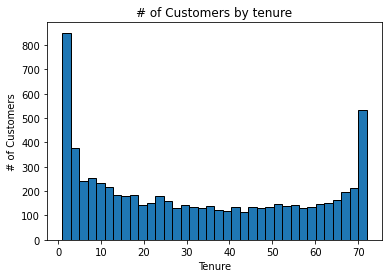

In [16]:
plt.hist(df['tenure'], bins=36, edgecolor='black')
plt.ylabel("# of Customers")
plt.xlabel("Tenure")
plt.title("# of Customers by tenure")
plt.show()

<Axes: ylabel='Frequency'>

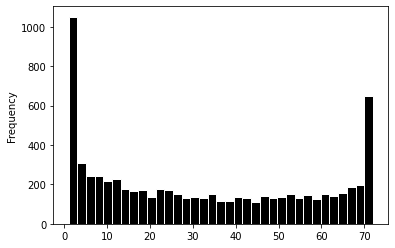

In [17]:
df['tenure'].plot(kind='hist', bins=35, edgecolor='white', cmap='copper')

Text(0.5, 1.0, '# of customers by contract type')

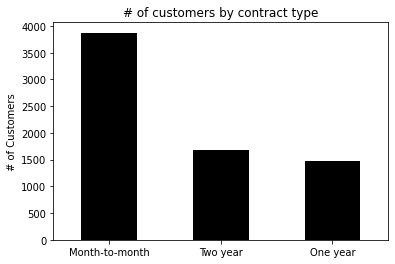

In [18]:
ax = df['Contract'].value_counts().plot(kind='bar', cmap='copper', rot=0)
ax.set_ylabel('# of Customers')
ax.set_title("# of customers by contract type")

In [19]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

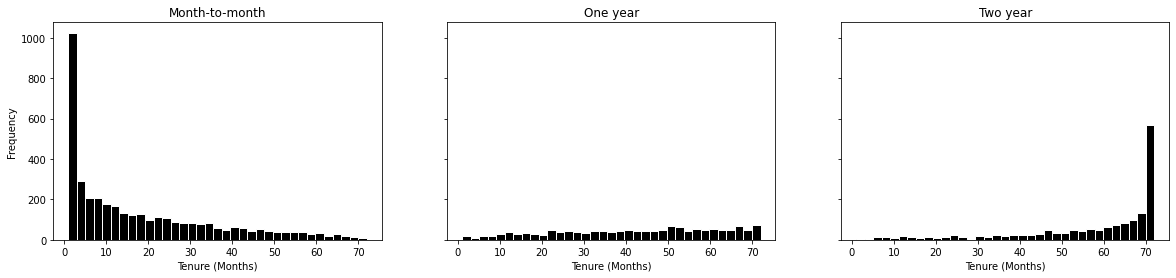

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey=True)
contract_types = df['Contract'].unique()

axes[0].set_ylabel("# of Customers")

for i in range(3):
#     axes[i].hist(
#         df['tenure'][df['Contract']==contract_types[i]],
#         bins=35,
#         edgecolor='black'
#     )
    
    df['tenure'][df['Contract']==contract_types[i]].plot.hist(bins=35, edgecolor='white', cmap='copper', ax=axes[i])
    axes[i].set_xlabel("Tenure (Months)")
    axes[i].set_title(contract_types[i])

<Axes: xlabel='Churn', ylabel='tenure'>

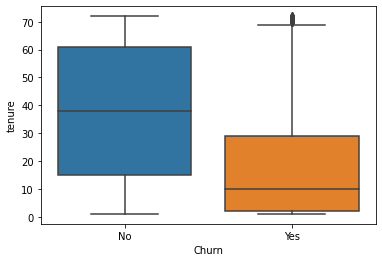

In [21]:
sns.boxplot(data=df, x='Churn', y='tenure')

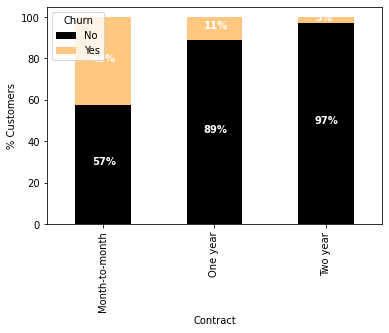

In [22]:
group = df.groupby(['Contract', 'Churn']).size().unstack()
ax = (group.T*100/group.sum(axis=1)).T.plot.bar(stacked=True, cmap='copper')

ax.set_ylabel("% Customers")
for p in ax.patches:
    ax.text(
        p.get_x()+0.15,
        p.get_y() + 0.5*p.get_height(),
        str(round(p.get_height()))+'%',
        weight='bold',
        color='white'
    )

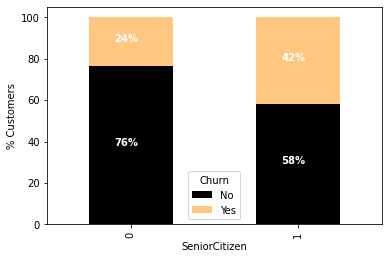

In [23]:
group = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
ax = (group.T*100/group.sum(axis=1)).T.plot.bar(stacked=True, cmap='copper')

ax.set_ylabel("% Customers")
for p in ax.patches:
    ax.text(
        p.get_x()+0.15,
        p.get_y() + 0.5*p.get_height(),
        str(round(p.get_height()))+'%',
        weight='bold',
        color='white'
    )

#### Predictive Models

In [24]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns='Churn')

from sklearn.preprocessing import MinMaxScaler
features = X.columns.values

scaler = MinMaxScaler(feature_range= (0, 100))
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.columns = features

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
metrics.accuracy_score(y_test, prediction)

0.795734597156398

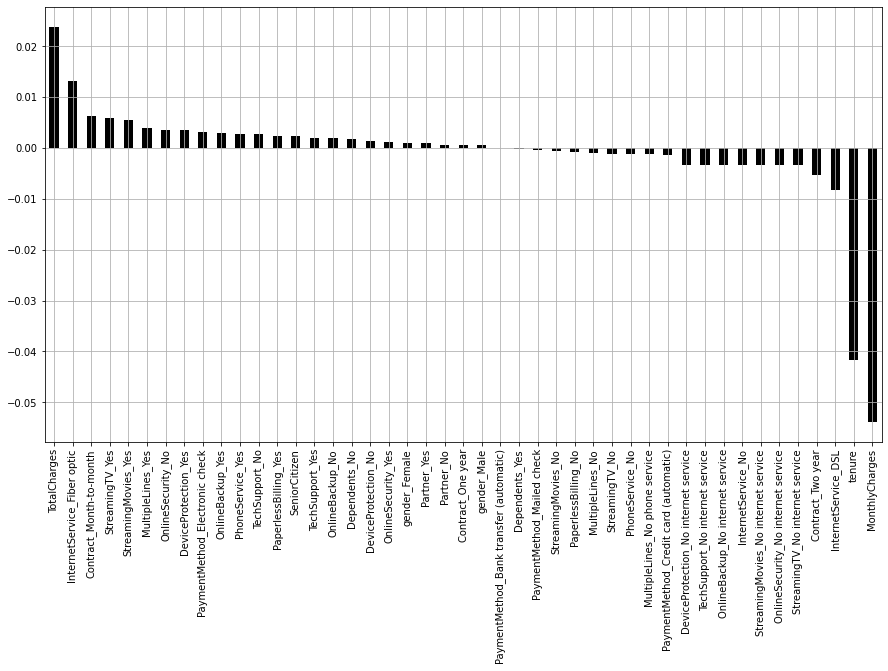

In [27]:
plt.figure(figsize=(15, 8))
pd.Series(model.coef_[0], index=X.columns.values).sort_values(ascending=False).plot(kind='bar', cmap='copper')
plt.grid()

#### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True, max_features='sqrt', max_leaf_nodes = 30)

model_rf.fit(X_train, y_train)
prediction = model_rf.predict(X_test)

metrics.accuracy_score(y_test, prediction)

0.7805687203791469

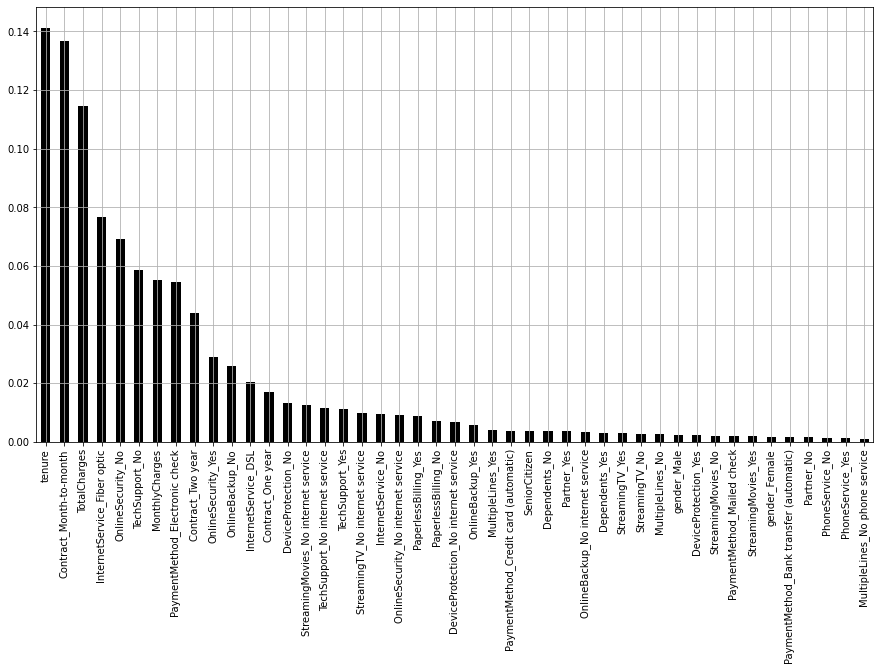

In [29]:
plt.figure(figsize=(15, 8))
pd.Series(model_rf.feature_importances_, index=X.columns.values).sort_values(ascending=False).plot(kind='bar', cmap='copper')
plt.grid()

#### XGBoost

In [41]:
from xgboost import XGBClassifier

model_xg = XGBClassifier(n_estimators=100, n_jobs=-1)
model_xg.fit(X_train, y_train)
prediction = model_xg.predict(X_test)

metrics.accuracy_score(y_test, prediction)

0.7786729857819905

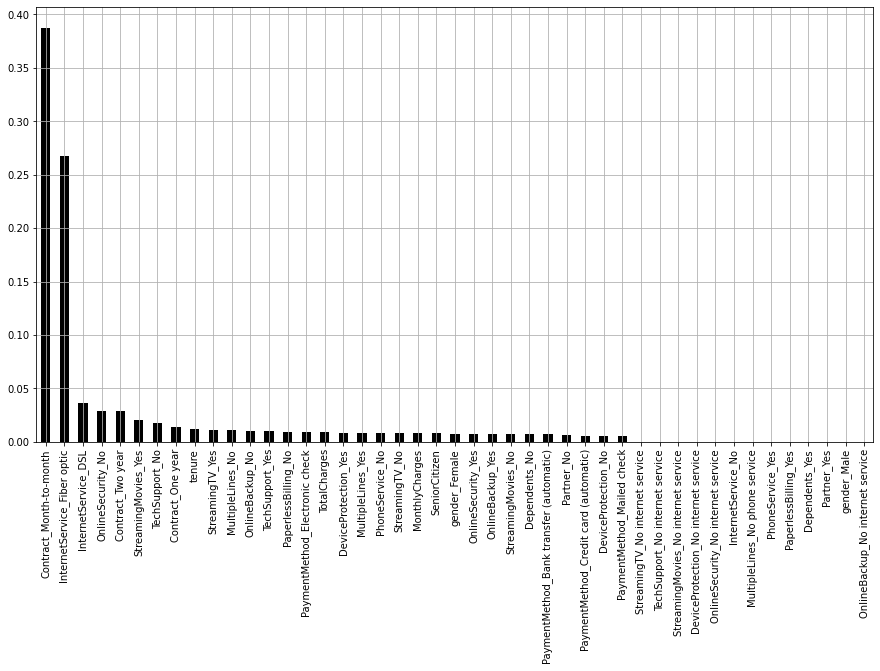

In [31]:
plt.figure(figsize=(15, 8))
pd.Series(model_xg.feature_importances_, index=X.columns.values).sort_values(ascending=False).plot(kind='bar', cmap='copper')
plt.grid()

#### Neural Network

In [37]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model = Sequential([
    Dense(124, activation='relu'),
    Dense(124, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss=BinaryCrossentropy())
model.fit(X_train, y_train, epochs=100)

prediction = model.predict(X_test)
prediction[prediction>=0.5] = 1
prediction[prediction<0.5] = 1
metrics.accuracy_score(y_test, prediction)

Epoch 1/100
154/154 [==============================] - 1s 3ms/step - loss: 1.7702
Epoch 2/100
154/154 [==============================] - 0s 3ms/step - loss: 0.8040
Epoch 3/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6699
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.5407
Epoch 5/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4948
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4281
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3998
Epoch 8/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4047
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3763
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3393
Epoch 11/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3488
Epoch 12/100
154/154 [==============================] - 0s 3ms/step - loss: 0.3233
Epoch 13/100


0.26303317535545023

In [33]:
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(hidden_layer_sizes=4, max_iter=2000)
nn.fit(X_train,y_train)
prediciton = nn.predict(X_test)


metrics.accuracy_score(y_test, prediction)

0.26303317535545023